In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###  1. You need to help the management decide upon a minimum number of images to be made mandatory for a listing that would ensure bookings. 
### 2. Also, come up with an optimal number of images that we can suggest the host to post along with a listing that would attract the most bookings and ensure success. 


In [2]:
listings = pd.read_csv('Listings.csv')
open_listings = pd.read_csv('Open_Listings.csv')
redundant_listings = pd.read_csv('Redundant_Listings.csv')

In [3]:
listings.head()

,Listing_Id,Posting_Date,Posting_Time,Location,Images,Bookings,Host_Type
0,4955430,13/05/2019,20:18:13,San Francisco,31,10,Regular
1,3338094,04/01/2016,05:30:37,Amsterdam,6,48,Regular
2,3132720,24/12/2018,12:26:15,Barcelona,25,10,Regular
3,3196344,14/10/2014,15:09:27,Berlin,10,134,Superhost
4,4588846,21/07/2016,09:26:48,Brussels,4,7,Regular


In [4]:
open_listings.head()

,Date,Open_Listings_0_2,Open_Listings_3_5,Open_Listings_6_10,Open_Listings_11_15,Open_Listings_16
0,08/01/2018,51918,59583,9558,28830,38364
1,08/02/2018,50196,67897,10820,23024,31676
2,08/03/2018,56239,52148,24258,34328,7342
3,08/04/2018,57762,67057,15148,15531,23232
4,08/05/2018,59221,53113,18165,18387,8486


In [5]:
redundant_listings = redundant_listings.drop(['Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'],1)
redundant_listings

,Property_Images,Total_Listings,Redundant_Listings
0,0 to 2,"563,246","428,368"
1,3 to 5,"716,923","264,321"
2,6 to 10,"1,341,164","98,874"
3,11 to 15,"993,269","53,292"
4,15 to 20,"873,269","61,382"
5,21 to 25,"635,481","29,285"
6,26 to 30,"498,456","42,473"
7,> 30,"384,875","28,274"


In [6]:
redundant_listings['Total_Listings'] = redundant_listings['Total_Listings'].apply(lambda x:int(x.replace(',','')))
redundant_listings['Redundant_Listings'] = redundant_listings['Redundant_Listings'].apply(lambda x:int(x.replace(',','')))

In [7]:
redundant_listings['percentage_of_bookings'] = (redundant_listings['Total_Listings']-redundant_listings['Redundant_Listings'])*100.0//redundant_listings['Total_Listings']

In [8]:
redundant_listings

,Property_Images,Total_Listings,Redundant_Listings,percentage_of_bookings
0,0 to 2,563246,428368,23.0
1,3 to 5,716923,264321,63.0
2,6 to 10,1341164,98874,92.0
3,11 to 15,993269,53292,94.0
4,15 to 20,873269,61382,92.0
5,21 to 25,635481,29285,95.0
6,26 to 30,498456,42473,91.0
7,> 30,384875,28274,92.0


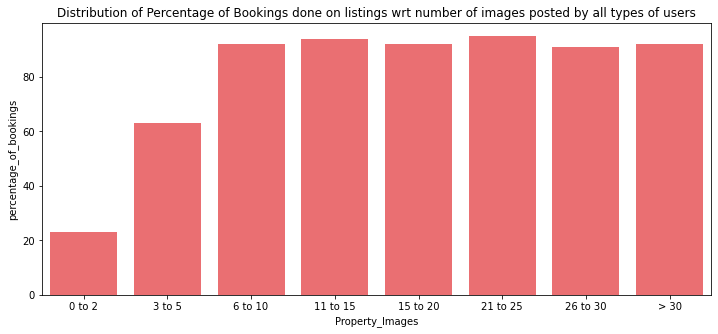

In [34]:
plt.figure(figsize=(12,5))
#'#FF5A5F'
sns.barplot(redundant_listings['Property_Images'],redundant_listings['percentage_of_bookings'],color='#FF5A5F')
plt.title('Distribution of Percentage of Bookings done on listings wrt number of images posted by all types of users')
plt.show()

In [10]:
listings['Posting_Date'] = pd.to_datetime(listings['Posting_Date'])
listings.sort_values(by='Posting_Date',ascending=True)

,Listing_Id,Posting_Date,Posting_Time,Location,Images,Bookings,Host_Type
185,5197757,2014-01-09,04:53:32,Toronto,28,134,Regular
432,4802899,2014-02-10,06:26:08,Mumbai,28,51,Regular
472,4960230,2014-02-10,14:05:00,Brussels,5,10,Regular
483,4862421,2014-02-12,07:26:28,Barcelona,30,31,Regular
318,5646005,2014-03-10,21:44:56,Toronto,29,304,Superhost
...,...,...,...,...,...,...,...
343,3305667,2019-11-07,11:43:30,Brussels,1,0,Regular
491,4542761,2019-11-07,11:46:18,Cambridge,7,4,Regular
334,4544153,2019-11-08,18:28:50,Cambridge,18,5,Regular
274,5750619,2019-12-03,15:08:44,Seattle,12,21,Regular


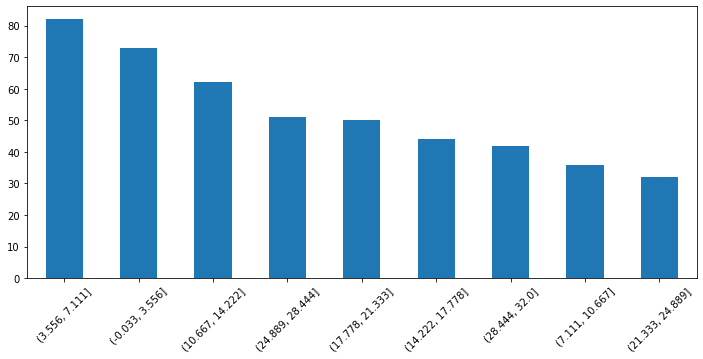

In [68]:
plt.figure(figsize=(12,5))
listings['Images'].value_counts(bins=9).plot.bar()
plt.xticks(rotation='45')
plt.figure(figsize=(12,5))


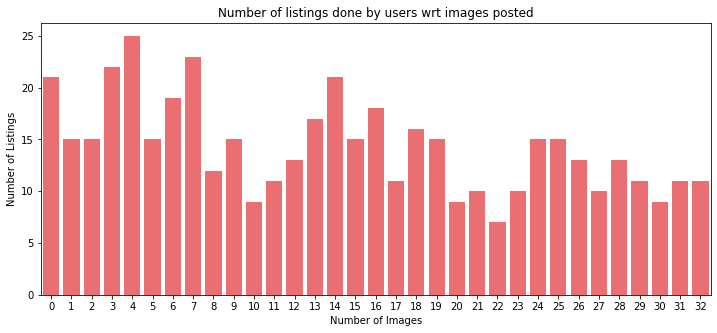

In [82]:
plt.figure(figsize=(12,5))

a = listings.groupby('Images').agg({'Bookings':'sum','Posting_Time':'count'}).reset_index()
a
sns.barplot(a['Images'],a['Posting_Time'],color = '#FF5A5F')
plt.xlabel('Number of Images')
plt.ylabel('Number of Listings')
plt.title('Number of listings done by users wrt images posted')
plt.show()

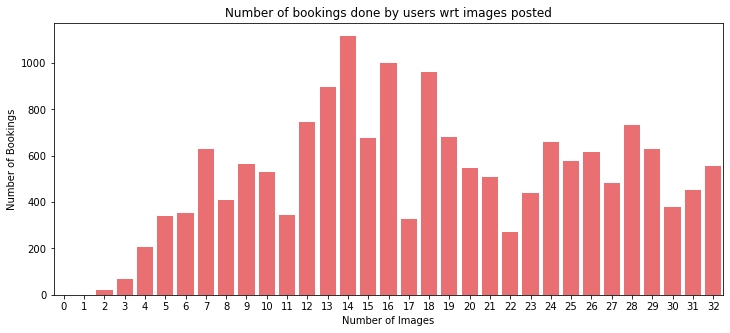

In [83]:
plt.figure(figsize=(12,5))

a = listings.groupby('Images').agg({'Bookings':'sum','Posting_Time':'count'}).reset_index()
a
sns.barplot(a['Images'],a['Bookings'],color = '#FF5A5F')
plt.xlabel('Number of Images')
plt.ylabel('Number of Bookings')
plt.title('Number of bookings done by users wrt images posted')

plt.show()

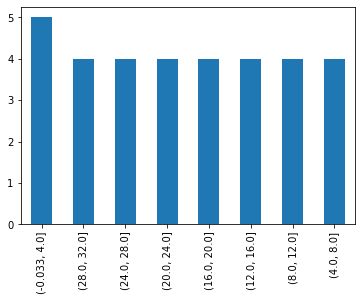

In [77]:
a['Images'].value_counts(bins=8).plot.bar()

In [11]:
listings_regular= listings[listings['Host_Type']=='Regular']
listings_super= listings[listings['Host_Type']=='Superhost']

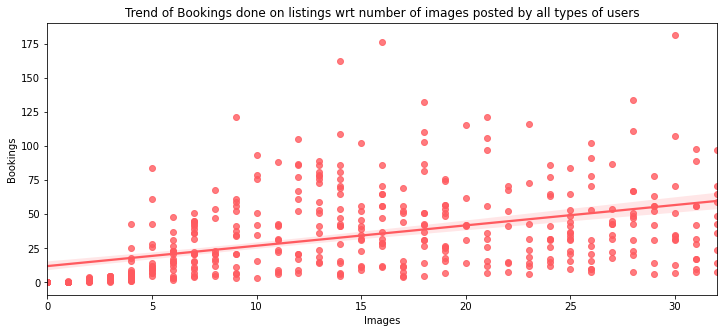

In [35]:
plt.figure(figsize=(12,5))
sns.regplot(listings_regular['Images'],listings_regular['Bookings'],color ='#FF5A5F'  )
plt.title('Trend of Bookings done on listings wrt number of images posted by all types of users')

plt.show()

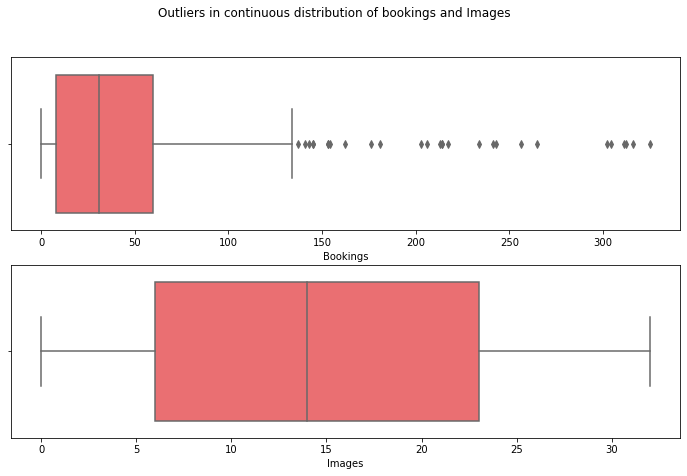

In [13]:
# sns.lineplot('Images','Bookings',data=listings)
fig,ax = plt.subplots(2,figsize=(12,7))
fig.suptitle('Outliers in continuous distribution of bookings and Images')
sns.boxplot(listings['Bookings'],ax=ax[0],color ='#FF5A5F' )
sns.boxplot(listings['Images'],ax=ax[1],color = '#FF5A5F')
plt.show()


In [14]:
q1 = listings['Bookings'].quantile(0.25)
q3 = listings['Bookings'].quantile(0.75)
iqr = q3-q1
upper_limit =  q3 + 1.5 * (iqr)
lower_limit =  q1- 1.5 * (iqr)
listings = listings[~((listings['Bookings']>upper_limit)|(listings['Bookings']<lower_limit))]

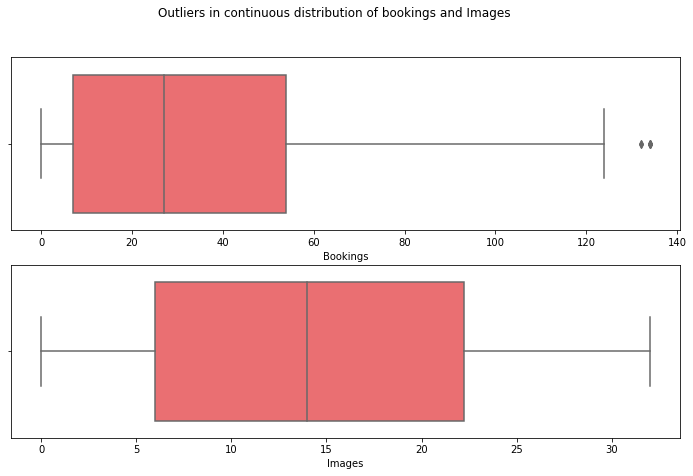

In [15]:
# sns.lineplot('Images','Bookings',data=listings)
fig,ax = plt.subplots(2,figsize=(12,7))
fig.suptitle('Outliers in continuous distribution of bookings and Images')
sns.boxplot(listings['Bookings'],ax=ax[0],color ='#FF5A5F' )
sns.boxplot(listings['Images'],ax=ax[1],color = '#FF5A5F')
plt.show()


In [16]:
listings.groupby('Location').agg({'Bookings':'sum','Images':'sum'}).reset_index()

,Location,Bookings,Images
0,Amsterdam,349,129
1,Auckland,135,68
2,Barcelona,332,187
3,Bengaluru,717,309
4,Berkeley,632,260
5,Berlin,786,253
6,Boston,606,218
7,Brussels,559,289
8,Cambridge,238,58
9,Cambridge,3,3


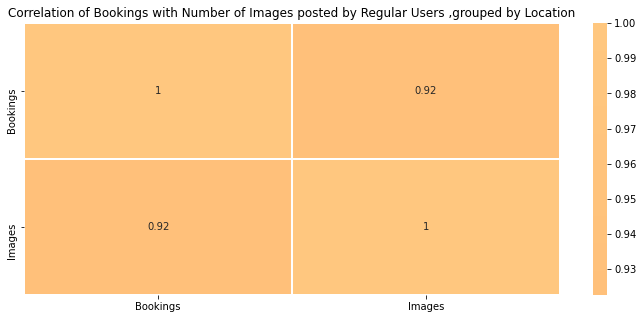

In [17]:
plt.figure(figsize=(12,5))

sns.heatmap(np.abs(listings_regular.groupby('Location').agg({'Bookings':'sum','Images':'sum'}).reset_index()[['Bookings','Images']].corr()),annot=True,
            center=0,linewidth=0.5,
            cmap='copper')
plt.title('Correlation of Bookings with Number of Images posted by Regular Users ,grouped by Location')
plt.show()

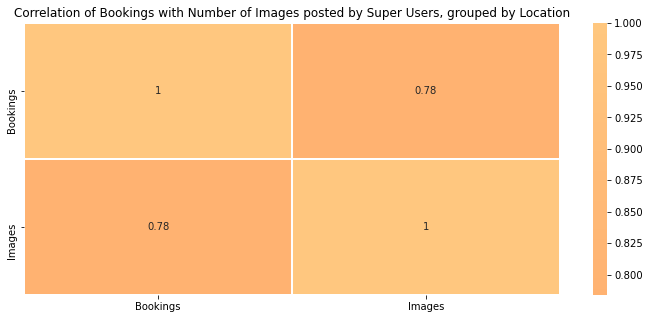

In [18]:
plt.figure(figsize=(12,5))

sns.heatmap(np.abs(listings_super.groupby('Location').agg({'Bookings':'sum','Images':'sum'}).reset_index()[['Bookings','Images']].corr()),annot=True,
            center=0,linewidth=0.5,
            cmap='copper')
plt.title('Correlation of Bookings with Number of Images posted by Super Users, grouped by Location')

plt.show()

In [19]:
open_listings.head()

,Date,Open_Listings_0_2,Open_Listings_3_5,Open_Listings_6_10,Open_Listings_11_15,Open_Listings_16
0,08/01/2018,51918,59583,9558,28830,38364
1,08/02/2018,50196,67897,10820,23024,31676
2,08/03/2018,56239,52148,24258,34328,7342
3,08/04/2018,57762,67057,15148,15531,23232
4,08/05/2018,59221,53113,18165,18387,8486


In [20]:
import datetime as dt

In [21]:
open_listings['Date'] = pd.to_datetime(open_listings['Date'])

In [22]:
open_listings['month'] = open_listings['Date'].dt.strftime('%b')

In [23]:
open_listings['year'] = open_listings['Date'].dt.year

In [24]:
open_listings.head()

,Date,Open_Listings_0_2,Open_Listings_3_5,Open_Listings_6_10,Open_Listings_11_15,Open_Listings_16,month,year
0,2018-08-01,51918,59583,9558,28830,38364,Aug,2018
1,2018-08-02,50196,67897,10820,23024,31676,Aug,2018
2,2018-08-03,56239,52148,24258,34328,7342,Aug,2018
3,2018-08-04,57762,67057,15148,15531,23232,Aug,2018
4,2018-08-05,59221,53113,18165,18387,8486,Aug,2018


In [25]:
open_all  = open_listings.groupby('month').agg({'Open_Listings_0_2':'sum','Open_Listings_3_5':'sum','Open_Listings_6_10':'sum','Open_Listings_11_15':'sum','Open_Listings_16':'sum'}).reset_index()

In [26]:
open_all.head()

,month,Open_Listings_0_2,Open_Listings_3_5,Open_Listings_6_10,Open_Listings_11_15,Open_Listings_16
0,Apr,1617295,1755464,608425,493056,687609
1,Aug,3401068,3741336,1248868,1203004,1394351
2,Dec,1702686,1899236,640240,682317,739341
3,Feb,1547261,1677452,581422,574189,532178
4,Jan,1689624,1892037,693319,562237,765062


In [53]:
list_means = []
for i in open_all.drop('month',1).columns:
    dict_at = {}
    dict_at[i] = np.mean(open_all[i])
    list_means.append(dict_at)
list_means

[{'Open_Listings_0_2': 1815973.9166666667},
 {'Open_Listings_3_5': 1968863.25},
 {'Open_Listings_6_10': 697406.0833333334},
 {'Open_Listings_11_15': 628273.5},
 {'Open_Listings_16': 755159.3333333334}]

In [52]:
min(list_means)

628273.5

In [42]:
 list(open_all[open_all['month']==1].drop('month',1).columns)

['Open_Listings_0_2',
 'Open_Listings_3_5',
 'Open_Listings_6_10',
 'Open_Listings_11_15',
 'Open_Listings_16']

In [49]:
pd.DataFrame(list_means)

,Open_Listings_0_2,Open_Listings_3_5,Open_Listings_6_10,Open_Listings_11_15,Open_Listings_16
0,1.815974e+06,NaN,NaN,NaN,NaN
1,NaN,1968863.25,NaN,NaN,NaN
2,NaN,NaN,697406.083333,NaN,NaN
3,NaN,NaN,NaN,628273.5,NaN
4,NaN,NaN,NaN,NaN,755159.333333


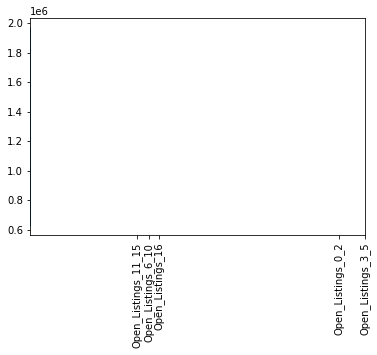

In [29]:
import matplotlib.pyplot as plt


x = list_means
labels =  list(open_all[open_all['month']==1].drop('month',1).columns)

plt.plot(x)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes

plt.show()



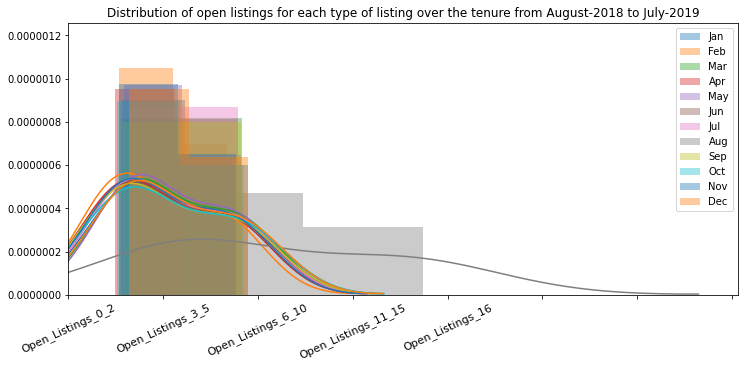

In [39]:
plt.figure(figsize=(12,5))
ax = sns.distplot(open_all[open_all['month']=='Jan'].drop('month',1))
ax=sns.distplot(open_all[open_all['month']=='Feb'].drop('month',1))
ax = sns.distplot(open_all[open_all['month']=='Mar'].drop('month',1))
ax= sns.distplot(open_all[open_all['month']=='Apr'].drop('month',1))
ax=sns.distplot(open_all[open_all['month']=='May'].drop('month',1))
ax = sns.distplot(open_all[open_all['month']=='Jun'].drop('month',1))
ax = sns.distplot(open_all[open_all['month']=='Jul'].drop('month',1))
ax = sns.distplot(open_all[open_all['month']=='Aug'].drop('month',1))
ax =  sns.distplot(open_all[open_all['month']=='Sep'].drop('month',1))
ax = sns.distplot(open_all[open_all['month']=='Oct'].drop('month',1))
ax = sns.distplot(open_all[open_all['month']=='Nov'].drop('month',1))
ax = sns.distplot(open_all[open_all['month']=='Dec'].drop('month',1))
plt.legend(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#plt.plot(range(open_all.drop('month',1).min().min(),open_all.drop('month',1).max().max(),1),range(open_all.drop('month',1).min().min(),open_all.drop('month',1).max().max(),100))
ax.ticklabel_format(useOffset=False,style='plain')
ax.set_xticklabels(open_all[open_all['month']==1].drop('month',1).columns, rotation='25',fontsize=11)
plt.xlim(0)
plt.margins(0.2)

plt.title('Distribution of open listings for each type of listing over the tenure from August-2018 to July-2019')
plt.show()

In [31]:
open_all.iloc[1:2]

,month,Open_Listings_0_2,Open_Listings_3_5,Open_Listings_6_10,Open_Listings_11_15,Open_Listings_16
1,Aug,3401068,3741336,1248868,1203004,1394351


In [32]:
from sklearn.cluster import KMeans


In [33]:
# Optimal K-value
kmeans = KMeans()
cluster_range = range(2,12)  # Selecting the cluster range
cluster_inertia = []
for n in cluster_range:
    model = KMeans(n)
    model.fit(df_segment[['Revenue','unique_order']])  # Using PCA components for Analysis
    cluster_inertia.append(model.inertia_)
Inertia_Frame = pd.DataFrame({'k-value/Number Of Clusters':cluster_range,'Value of Inertia Obtained':cluster_inertia})
Inertia_Frame

NameError: name 'df_segment' is not defined